In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense, Conv1D, GlobalMaxPooling1D, Flatten, concatenate, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.metrics import Precision, Recall, Accuracy
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam, SGD

import torch
from torch.nn.utils.rnn import pad_sequence
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import numpy as np
import pickle

import pandas as pd

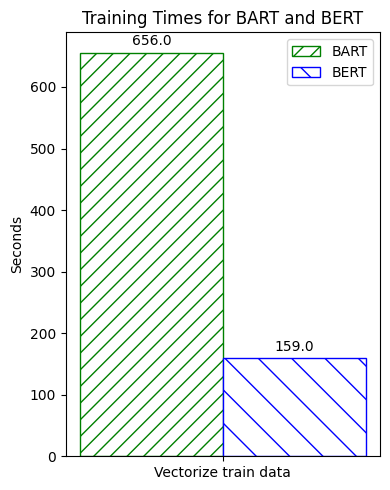

In [11]:
# Updated data
labels = ['Vectorize train data']
bart = [10*60 +56]  # Converted to seconds
bert = [2*60 + 39]  # Converted to seconds
# bart = [60 + 46.9]  # Converted to seconds
# bert = [60 + 50.2]  # Converted to seconds

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(4, 5))

rects1 = ax.bar(x - width/2, bart, width, label='BART', hatch='//', edgecolor='green', color='white')
rects2 = ax.bar(x + width/2, bert, width, label='BERT', hatch='\\', edgecolor='blue', color='white')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Seconds')
ax.set_title('Training Times for BART and BERT')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add values on top of bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


In [3]:
with open("X_train_clauses", "rb") as fp:
    X_train_clauses = pickle.load(fp)
with open("X_test_clauses", "rb") as fp:
    X_test_clauses = pickle.load(fp)
with open("X_trail_clauses", "rb") as fp:
    X_trail_clauses = pickle.load(fp)

In [4]:
def del_unwanted_data(data):
    for index in range(len(data)):
        if len(data[index]) > 3:
            data[index] = data[index][1:]
    return data

In [5]:
X_train_clauses = del_unwanted_data(X_train_clauses)
X_test_clauses = del_unwanted_data(X_test_clauses)
X_trail_clauses = del_unwanted_data(X_trail_clauses)

In [6]:
X_train = [data[0] for data in X_train_clauses]
y1_train = [data[1] for data in X_train_clauses]
y2_train = [data[2] for data in X_train_clauses]

X_test = [data[0] for data in X_test_clauses]
y1_test = [data[1] for data in X_test_clauses]
y2_test = [data[2] for data in X_test_clauses]

X_trail = [data[0] for data in X_trail_clauses]
y1_trail = [data[1] for data in X_trail_clauses]
y2_trail = [data[2] for data in X_trail_clauses]

In [7]:
print(len(X_train), len(X_test), len(X_trail))

2508 861 66


In [8]:
from transformers import BartTokenizer, BartModel
import torch

def vectorize(clauses, file_name):
    tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
    model = BartModel.from_pretrained('facebook/bart-large')

    clause_vectors = []
    nr = 0

    for clause in clauses:
        inputs = tokenizer(clause, return_tensors="pt", truncation=True)
        with torch.no_grad():
            outputs = model(**inputs)

        last_hidden_state = outputs.last_hidden_state

        clause_vectors.append(last_hidden_state)
        print(f"Done {nr}")
        nr += 1

    print(clause_vectors[:2])
    # with open(file_name, "wb") as fp:   #Pickling
    #     pickle.dump(clause_vectors, fp)

In [9]:
vectorize(X_train, "X_train_bart_2")

Done 0
Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12
Done 13
Done 14
Done 15
Done 16
Done 17
Done 18
Done 19
Done 20
Done 21
Done 22
Done 23
Done 24
Done 25
Done 26
Done 27
Done 28
Done 29
Done 30
Done 31
Done 32
Done 33
Done 34
Done 35
Done 36
Done 37
Done 38
Done 39
Done 40
Done 41
Done 42
Done 43
Done 44
Done 45
Done 46
Done 47
Done 48
Done 49
Done 50
Done 51
Done 52
Done 53
Done 54
Done 55
Done 56
Done 57
Done 58
Done 59
Done 60
Done 61
Done 62
Done 63
Done 64
Done 65
Done 66
Done 67
Done 68
Done 69
Done 70
Done 71
Done 72
Done 73
Done 74
Done 75
Done 76
Done 77
Done 78
Done 79
Done 80
Done 81
Done 82
Done 83
Done 84
Done 85
Done 86
Done 87
Done 88
Done 89
Done 90
Done 91
Done 92
Done 93
Done 94
Done 95
Done 96
Done 97
Done 98
Done 99
Done 100
Done 101
Done 102
Done 103
Done 104
Done 105
Done 106
Done 107
Done 108
Done 109
Done 110
Done 111
Done 112
Done 113
Done 114
Done 115
Done 116
Done 117
Done 118
Done 119
Done 120
Done 121
Done 122
Don

In [ ]:
vectorize(X_test, "X_test_bart_2")

In [36]:
vectorize(X_trail, "X_trail_bart_2")

------------------------> Done sentence  0 <----------------------------
------------------------> Done sentence  1 <----------------------------
------------------------> Done sentence  2 <----------------------------
------------------------> Done sentence  3 <----------------------------
------------------------> Done sentence  4 <----------------------------
------------------------> Done sentence  5 <----------------------------
------------------------> Done sentence  6 <----------------------------
------------------------> Done sentence  7 <----------------------------
------------------------> Done sentence  8 <----------------------------
------------------------> Done sentence  9 <----------------------------
------------------------> Done sentence  10 <----------------------------
------------------------> Done sentence  11 <----------------------------
------------------------> Done sentence  12 <----------------------------
------------------------> Done sentence  13 <---

In [37]:
with open("X_train_bart_2", "rb") as fp:
    X_train_bart = pickle.load(fp)
with open("X_test_bart_2", "rb") as fp:
    X_test_bart = pickle.load(fp)
with open("X_trail_bart_2", "rb") as fp:
    X_trail_bart = pickle.load(fp)

In [38]:
model_raw_data = (X_train, X_train_bart,  X_test, X_test_bart, y1_train, y1_test, y2_train, y2_test)
with open("model_raw_data_2", "wb") as fp:   #Pickling
    pickle.dump(model_raw_data, fp)

In [39]:
val_raw_data = (X_trail, X_trail_bart, y1_trail, y2_trail)
with open("val_raw_data_2", "wb") as fp:   #Pickling
    pickle.dump(val_raw_data, fp)